
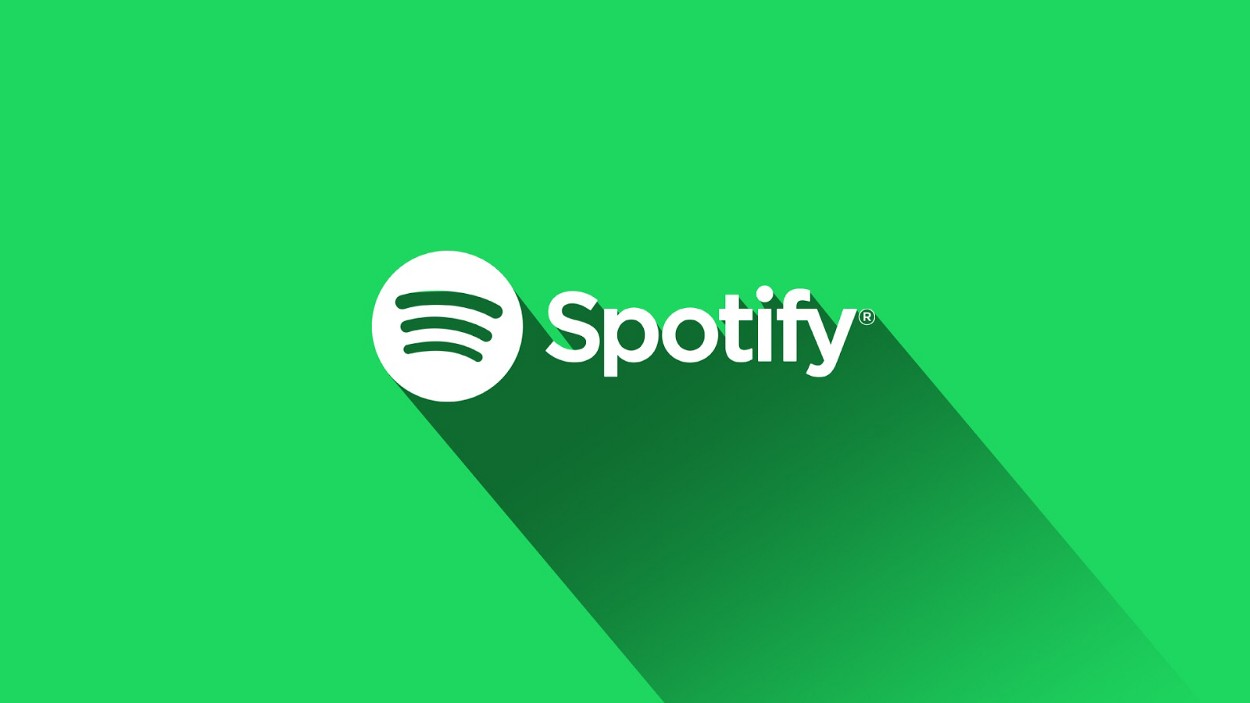

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
# helpful character encoding module
import chardet
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from sklearn import preprocessing
import plotly.express as px

Let's first check in which encoding this dataset in because python only opens which are in 'utf-8' encoding.

In [ ]:
# look at the first ten thousand bytes to guess the character encoding
with open('../input/top50spotify2019/top50.csv','rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
print(result)

So its in 'Windows-1252', means we have to mention it while reading csv file.

In [ ]:
music=pd.read_csv('../input/top50spotify2019/top50.csv', encoding='Windows-1252',index_col=0)

In [ ]:
music.info()

In [ ]:
#create a min max processing object
min_max_scaler = preprocessing.MinMaxScaler()
music[['Energy','Danceability','Loudness..dB..','Liveness','Valence.','Acousticness..','Speechiness.']]= min_max_scaler.fit_transform(music[['Energy','Danceability','Loudness..dB..','Liveness','Valence.','Acousticness..','Speechiness.']])


First,understand the meaning of the values in the given dataset.

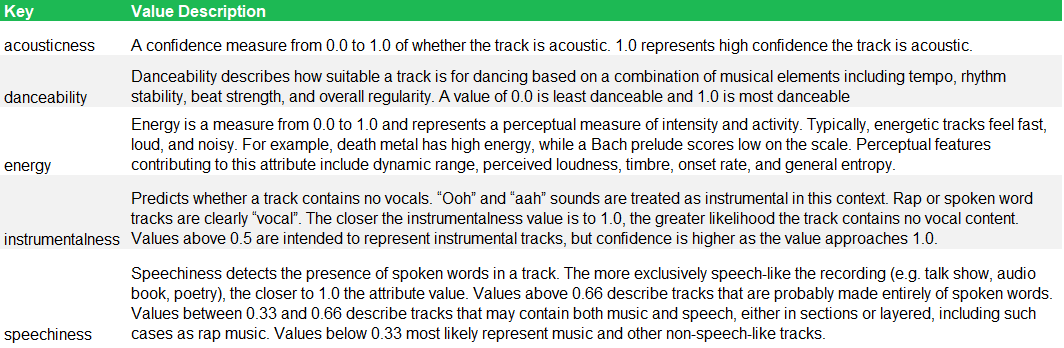

Have a look at our dataset.

In [ ]:
music.head()

In [ ]:
music.describe()

In [ ]:
Songs = [trackname for trackname in music['Track.Name']]
wc_dict = Counter(Songs)
wordcloud = WordCloud(width=1000, height=500).generate_from_frequencies(wc_dict)
plt.figure(figsize = (16, 9))
plt.imshow(wordcloud)
plt.axis('off');

Let's start our anaylsis by finding out most popular song of 2019 according to our dataset.

In [ ]:
music.sort_values(by='Popularity',ascending=False).head()

It shows outlier values and value of popularity

In [ ]:
#Boxplot
sns.boxplot( y = music["Popularity"])
plt.show()

Relation between Genre and popularity

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(y=music.Genre, x=music['Popularity'])

It gives count of genre in spotify top 50 list.

In [ ]:
#Catplot
plt.figure(figsize=(16,9))
sns.catplot(y = "Genre", kind = "count",
            palette = "pastel", edgecolor = ".5",
            data = music)
plt.show()

Popularity variation with Genre 

In [ ]:
plt.figure(figsize=(16,9))
sns.boxplot(x="Genre", y="Popularity", data=music)
plt.ylabel('Popularity', fontsize=12)
plt.xlabel('Genre Count', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

How much frequency of beats make song popular?

In [ ]:
plt.figure(figsize=(16,9))
sns.jointplot(x=music['Beats.Per.Minute'], y=music['Popularity'], kind="kde")

In [ ]:
fig = px.pie(music, values = 'Popularity', names='Artist.Name')
fig.show()

Lenght variation of popupar songs.

In [ ]:
plt.figure(figsize=(12,7))
sns.lineplot(data=music['Length.'], label="trend")
sns.set_style("dark")

Relationship between speechiness and popularity.

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(x=music['Speechiness.'], y=music.Popularity)
sns.set_style("dark")

After removing categorical column,analysing with numerical values

In [ ]:
music = music.drop(['Track.Name', 'Artist.Name', 'Genre'], axis = 1)

In [ ]:
sns.pairplot(data = music, corner = True)
sns.set_style("dark")

**HEATMAP**

In [ ]:
plt.figure(figsize = (11, 11))
sns.heatmap(data = music.corr(),
            annot = True,
            square = True,
           linewidths = 0.5)

**Please upvote if you like it.**